In [438]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import sounddevice as sd

## Ejercicio 1 - Generación de señales
Generaremos muestras a partir de la siguiente señal continua:
$$  x(t)=  sin\left( 2\pi f_0t)+cos(2\pi f_1t) \right. $$

donde $f_0=2Hz $  y $f_1=3f_0$

1.1 Implemente una función def $x(t)$ que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [439]:
f0=2        #definimos f_0 con el valor que nos indican
f1=3*f0        ##definimos f_1 con el valor que nos indican
#procedemos a escribir la funcion que nos piden
def fun(t):
    x=np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)  #señal indicada
    return(x)   #retornamos el valor

1.2 Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0}=1000 $ Hz sobre $N_0=1024 $ muestras:

Genere un arreglo $t_0$ de  muestras temporales de valores $ t=\dfrac{n}{f_{s0}} $
 
Evalue la función $x$  en el vector de tiempo $t_0$  y almacene los valores resultantes $x[n]$ en un vector $x_0$.

Trace la señal con el eje de tiempo correcto en segundos.% (\texttt{pl.figure}, \texttt{pl.plot}, \texttt{pl.title})

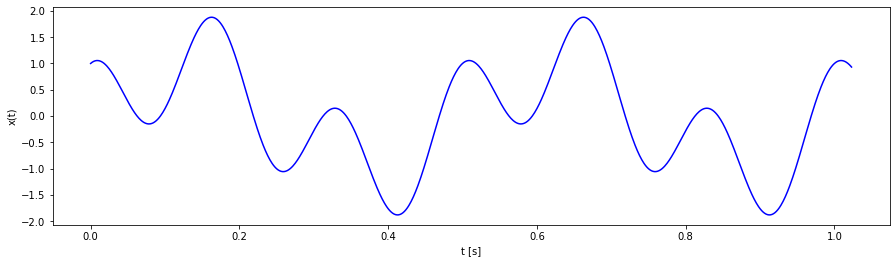

In [440]:
N0=1024           #definimos el numero de datos de nuestra partición
fs0=1000          #definimos a la frecuencia que nos indican
ancho=1./fs0      #notamos que el ancho de nuestra particion uniforme, sera el inverso de la frecuencia
ini=0            #Partimos de 0
fin=N0/fs0       #Valor donde termina nuestra partición para esta frecuencia y esta cantidad de datos.
t0=np.arange(ini,fin,ancho)           #particion

#print(len(t0))

x0=fun(t0)              #funcion evaluada en t0

#Grafico
plt.subplots(1,1,figsize=(15,4))
o1=plt.plot(t0,x0,'b-')
plt.xlabel('t [s]');
plt.ylabel('x(t)');

1.3 Genere una señal $x_n$ con una frecuencia de muestreo $f_s=20$ sobre $N=f_s$ muestras (muestreo de 1 segundo).

Text(0, 0.5, '$x_n(t_n)$')

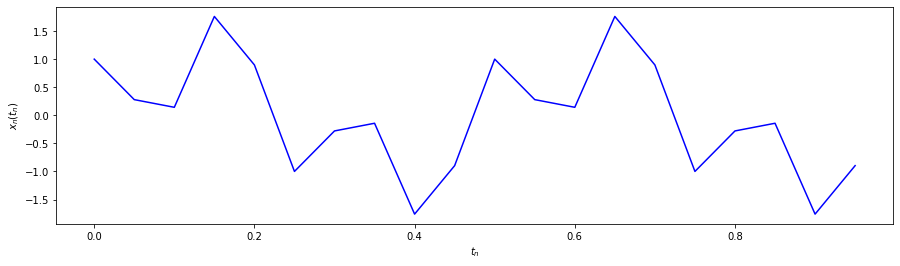

In [441]:
fs=20
N=fs
ancho1=1./fs
fin1=N/fs

tn=np.arange(ini,fin1,ancho1)           #particion
#print(len(t0))
xn=fun(tn)              #funcion evaluada en t0

fig,ax=plt.subplots(1,1,figsize=(15,4))      #Grafico
o1=plt.plot(tn,xn,'b-')
plt.xlabel('$t_n$')
plt.ylabel('$x_n(t_n)$')


1.4 Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado ``-o'' para ver la posición de las muestras.

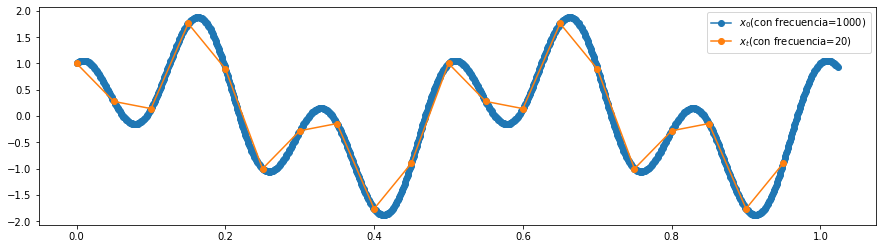

In [445]:
fig,ax=plt.subplots(1,1,figsize=(15,4))
plt.plot(t0,x0,'-o',label = '$x_0$(con frecuencia=1000)');
plt.plot(tn,xn,'-o', label= '$x_t$(con frecuencia=20)');
plt.legend();

## 1.2 Reconstrucción de señales

1.¿Cuál es la frecuencia de muestreo necesaria $f_s$ para garantizar que la señal $x(t)$ puede reconstruirse?

Para responder esto ocuparemos el teorema de N-S el cual como condición para garantizar la reconstrucción de la señal es que su transformada de Fourier tengo soporte compacto en $[-\dfrac{\pi}{T},\dfrac{\pi}{T}]$, así que procedemos a calcular la T.F de nuestra señal:

$$x(t) = \sin(4\pi t) + \cos(12\pi t)$$

Entonces:

$$\hat{x} (\omega) = \dfrac{\pi}{i} (\delta (\omega - 4\pi)-\delta(\omega + 4\pi)) + \pi (\delta (\omega -12\pi)+\delta (\omega +12\pi))$$


valor final donde $\hat{x}(\omega)=$  37.829912023460395


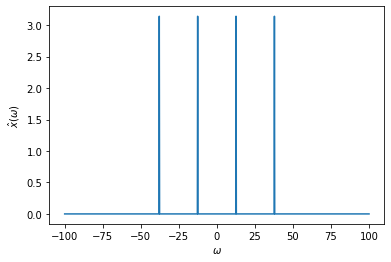

In [455]:
#Definimos constantes que ocuparemos

L = 100
w = np.linspace(-L,L,N0)
n_w1 = int((L-4*np.pi)*N0/(2*L))
mn_w1 = int((L+4*np.pi)*N0/(2*L))
n_w2 = int((L-12*np.pi)*N0/(2*L))
mn_w2 = int((L+12*np.pi)*N0/(2*L))

#Calculamos la T.F de nuestra señal
xhat = (np.pi/1j)*(signal.unit_impulse(N0,mn_w1) - signal.unit_impulse(N0,n_w1)) + np.pi*(signal.unit_impulse(N0,n_w2) + signal.unit_impulse(N0,mn_w2))

#Graficamos el modulo de la T.F de nuestra señal.
plt.plot(w,abs(xhat));
plt.ylabel('$\hat{x}(\omega)$');
plt.xlabel('$\omega$');
#veamos donde la funcion es distinta de 0 y tiene esas lineas verticales.
u=np.array
for i in np.arange(N0):
    if xhat[i]!=0:
        a=i
        
#el valor final donde la transformada es distinta de 0 es:       
print('valor final donde $\hat{x}(\omega)=$ ',w[a])

Por lo tanto para cumplir la hipotesis del teorema de N.S:  $ \omega\in[-\infty,-37.82]\cup[37.82,\infty]\approx[-\infty,-12\pi]\cup[12\pi,\infty]$

$$\Leftrightarrow |\omega|\geq 12\pi $$

y como el soporte tiene que ser compacto en $[\dfrac{-\pi}{T}, \dfrac{\pi}{T}] \Rightarrow  |\omega|\leqslant \dfrac{\pi}{T}$, asi:

$$   12\pi\leqslant |\omega|\leqslant\dfrac{\pi}{T}=\pi f_s        $$

$$ 12\leqslant f_s $$

Por lo tanto la frecuencia para poder reconstruir la señal tiene que ser $ f_s\geq12 $

2.Programe una función $def recSinc(x_s,t_s,f_s,t)$ que reconstruya una señal en el tiempo t a partir de muestra $x_s,t_s$ a la frecuencia $f_s$

In [449]:
# Funcion que nos reconstruira la señal ocupando la formula de reconstrccion del teorema de N-S

def recSinc(xs,ts,fs,t):
    rec = []
    
    for i in t:
        np.array(rec.append(np.sum(xs*np.sinc(np.pi*fs*(i-ts)))))
        
    return rec


3.Grafique simultáneamente $x_0$ y la interpolación de $x_n$ en $t_0$. ¿Qué pasa en el borde de la ventana de muestreo?

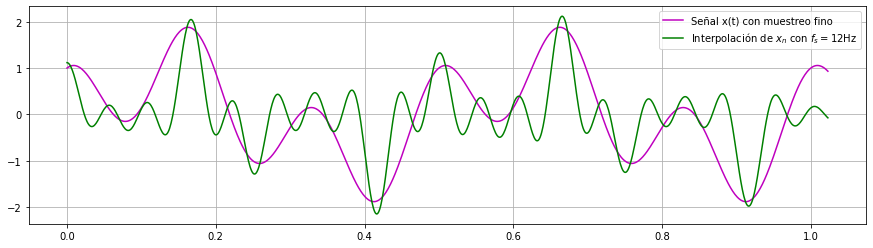

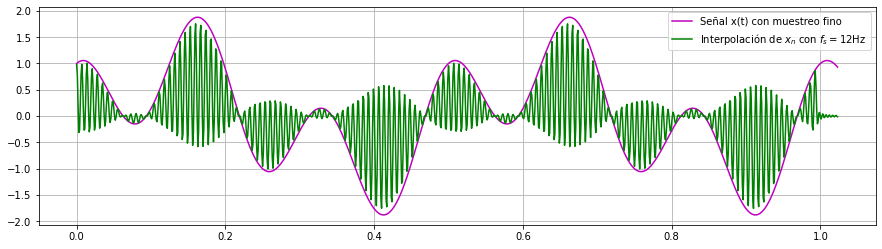

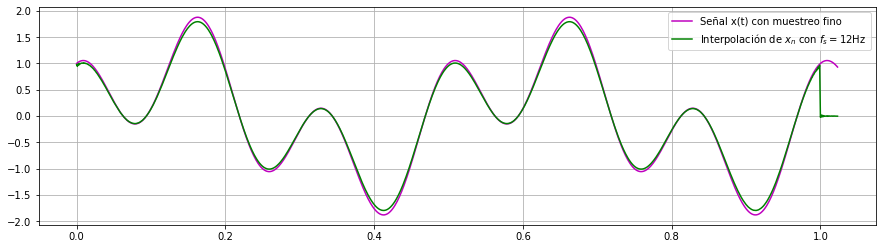

In [465]:
# Definimos variables que ocuparemos para graficar ocupando 3 valores distintos de la frecuencia.
for j in [12,12**2,1000]:
    fs = j
    tn = np.arange(0,1,1/fs)
    xn = fun(tn)

    # Graficamos
    plt.figure(figsize = (15,4))
    plt.plot(t0,x0,'m-', label = 'Señal x(t) con muestreo fino')
    plt.plot(t0,recSinc(xn,tn,fs,t0),'g-', label = 'Interpolación de $x_n$ con $f_s = 12$Hz')
    plt.legend()
    plt.grid();



4.Modifique la frecuencia de muestreo de $f_s = 20$ a $f_s =10$. ¿Qué sucede con la reconstrucción?

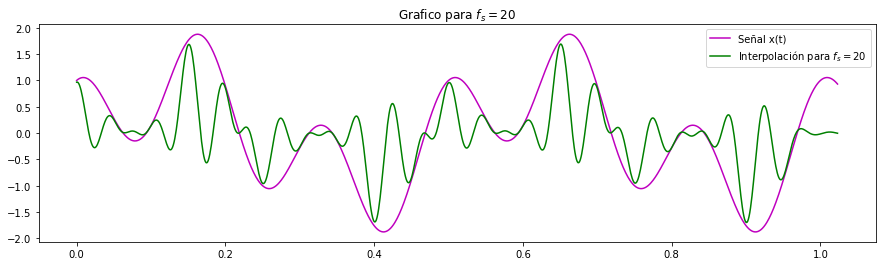

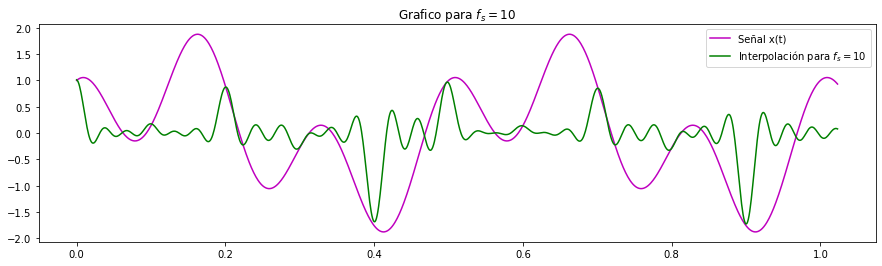

In [467]:
# Definimos las constantes para las frecuencias que nos piden.

for i in[20,10]:
    #Definimos como queda la particion para las frecuencias pedidas
    t_20 = np.arange(0,1,1/i)
    x_20 = fun(t_20)
    rec_20 = recSinc(x_20,t_20,20,t0);
    
    #graficamos
    plt.subplots(1,1,figsize=(15,4))
    plt.plot(t0,x0,'m-', label = 'Señal x(t) ')
    plt.plot(t0,rec_20,'g-',label = f'Interpolación para $f_s ={i}$')
    plt.title(f'Grafico para $f_s={i}$')

    plt.legend()



Vemos que con $f_s=20$ la reconstrucción es mejor que la con $f_s=10$ ya tenemos más muestras en cada ciclo y se nota que agarra mejor las subidas y bajadas de nuestra señal.

### 1.3 Generación de señales de audio

En esta parte trabajaremos con secuencias de audio. Para hacer eso usaremos scipy.io.wavefile para cargar y guardar archios en formato .wav.Tambien es posible escuchas audio directamente en python usando la librería de manipulación audio sounddevice que se puede instalar con pip o conda.En esta sección las señales generadas solo seran escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en la siguiente sección.

1.Genere 1 segundo de onda sinusoidal de magnitud 0.5 y de frecuencia $f_0 = 425 Hz$ muestreada a $f_s = 8000Hz$. Guárdelo como archivo wave y escuche el archivo o escuche directamente la señal desde python. Este es el tono de marcado de los teléfonos europeos.

In [368]:
# Definimos variables
dur=1
M = 0.5
f0 = 425 
fs = 8000 
ts = np.arange(0,dur,1/fs) 

# Definimos la señal
señal = M*np.sin(2*np.pi*f0*ts) 

#Guardamos la señal
ton_tel_eu = waves.write("ton.wav",1,señal.astype(np.int16))

# Escuchamos el sonido
sd.play(señal,fs)

2.Es posible generar notas musicales a partir de su número MIDI $m$ donde la frecuencia se expresa como

$$f_m = 440\cdot 2^{\dfrac{m-69}{12}}$$

Vemos que hay doce semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es $A4$ en notación y es el estándar de tono para afinar instrumentos para conciertos.

Implemente una función def getNote(m,fs,l) que devuelve la nota $m$ tocada durante $l$ segundos a la frecuencia $f_s$.

In [384]:
#Definimos la función indicada
def getNote(m,fs,l):
    
    fm = 440*(2**((m-69)/12))
    t = np.arange(0,l,1/fs)
    señal = np.sin(2*np.pi*fm*t)
    #Reproducimos
    sd.play(señal,fs)
    sd.wait()
    return señal

3.Guarde la nota m = 69 en un archivo llamado "A4.wav". Escuche varias otras notas MIDI. ¿Qué pasa para m = 117 (LA8) cuando se guarda a la frecuencia de muestreo $f_s = 8000 Hz$?

In [427]:
# Definimos variables
m=69
l=1
fs=8000

#Guardamos y reproducimos la señal
A4 = waves.write("A4.wav",1,getNote(m,fs,l).astype(np.int16))

# Escuchar otras notas MIDI
getNote(10,1000,1)  
getNote(20,2000,1)  
getNote(30,3000,1)   
getNote(40,4000,1)   
getNote(50,5000,1)   
getNote(60,6000,1) 
getNote(70,7000,1)
getNote(80,8000,1) 
getNote(90,9000,1);

In [426]:
#Para m=115(LA8) y fs=8000
getNote(117,8000,1);

4.Codifique una secuencia de concatenación de notas [70,72,68,56,63] (1 seg cada una) y guarde la secuencia como archivo "sec.wav".¿Le suena la secuencia?

In [470]:
# Reproducimos y guardamos la secuencia:
secuencia=[]

for m in [70,72,68,56,63]:
    getNote(m,fs,1)
    np.array(secuencia.append(waves.write(f"sec{m}.wav",1,getNote(m,fs,1).astype(np.int16))))

5.La saturación puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto de la saturación puede ser reproducido usando un "clipeo" en un seno.

Compare la señal de la nota $m = 69$ a $440 Hz$ para diferentes valores de recorte. Guarde la nota usando el "clipeo" en un archivo "A4clip.wav". ¿Cuál es el efecto de la saturación en el contenido frecuencial de la señal?

In [477]:
# Guardamos la nota MIDI m = 69 durante 2 segundos
getNote(69,4400,1)
sd.wait()

#Generando Clipeo
A4 = getNote(40,44100,2)
A4 = 10*A4
#Reproducimos el Clipeo
sd.play(A4,44100)

# Guardamos esta nota.
A4clip = waves.write("A4clip.wav",2,A4.astype(np.int16))


6.Genere la señal

$$x(t) = \sin\left(2\pi\left(\omega_0t + \dfrac{c}{2}t^{2}\right)\right)$$

con $f_0 = 100$Hz y $c = 500$ durante 1 segundo a una frecuencia de muestreo $f_s = 8000$Hz. Esta señal es llamada "chrip" y corresponde a una modulación de frecuencia. Guarde la señal en el archivo "chirp.wav".

In [478]:
#Definimos constantes que ocuparemos
f0 = 100 
c = 500
l=1
fs = 8000 
t = np.arange(0,l,1/fs)
w0=2*np.pi*f_0

#generamos la señal
xt =np.sin(2*np.pi*(w0*t+((c/2)*t**2)))

# Escuchemos
sd.play(xt,fs)

# Guardamos la señal.
chrip = waves.write("chrip.wav",1,xt.astype(np.int16))
